In [49]:
# Imports
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [47]:
def pca(data, labels, k=None):
    """
    pca()
    performs PCA on the given data. Outputs the k principal components.
    """

    # Normalize the data
    normalized_data = pd.DataFrame(StandardScaler().fit_transform(data.iloc[: , 1:]))

    # Perform pca
    pca = PCA(n_components=k)
    principal_components = pd.DataFrame(pca.fit_transform(normalized_data))
    principal_components
    result = pd.concat([principal_components, labels["Class"]], axis = 1)

    # Return the k principal components
    return result


In [48]:
dir_path = os.getcwd()
data = pd.read_csv(f'C:/Users/Boris/Google Drive/Studie/Master/2021-2022-1B/Pattern Recognition/pattern-recognition-a2/data/genes/data.csv')
labels = pd.read_csv(f'C:/Users/Boris/Google Drive/Studie/Master/2021-2022-1B/Pattern Recognition/pattern-recognition-a2/data/genes/labels.csv')

result = pca(data, labels, 2)
result

,0,1,Class
0,-57.446987,95.410980,PRAD
1,-16.919430,0.732471,LUAD
2,-70.345218,-19.303326,PRAD
3,-49.161591,-9.227586,PRAD
4,-18.132534,-51.327797,BRCA
...,...,...,...
796,-12.417385,-42.321573,BRCA
797,-29.415554,28.526281,LUAD
798,-4.133090,15.690013,COAD
799,-30.814757,33.526422,PRAD


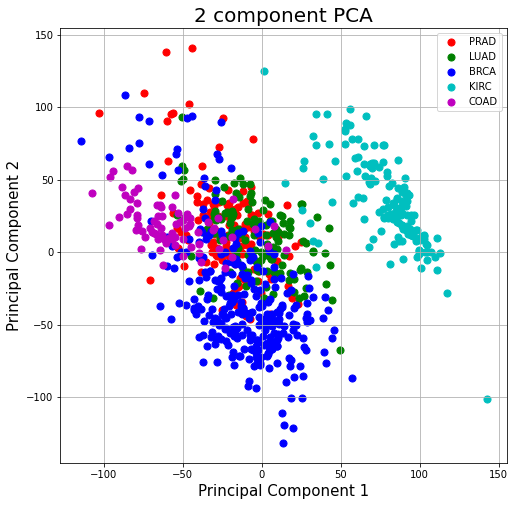

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = result["Class"].unique().tolist()
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = result['Class'] == target
    ax.scatter(result.loc[indicesToKeep, 0]
               , result.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()